# Martingales

In [1]:
using Distributions

In [38]:
using Plots

## Polya Urns Simulation

In [89]:
function polya(black, white)
    function gen(b,w)
        Z = rand()
        if Z < b/(b+w)
            b += 1
        else
            w += 1
        end
        return (b/(b+w)), () -> polya_(b,w)
    end
    return () -> gen(black, white)
end

function unfold(gen,n)
    out = zeros(n)
    for i in 1:n
        ratio, gen = gen()
        out[i] = ratio
    end
    return out
end

unfold (generic function with 1 method)

In [91]:
unfold(mkPolya(3,1),10)

10-element Array{Float64,1}:
 0.8               
 0.6666666666666666
 0.5714285714285714
 0.625             
 0.6666666666666666
 0.7               
 0.6363636363636364
 0.6666666666666666
 0.6923076923076923
 0.7142857142857143

("Ensemble Average:", 0.19428855721393037)

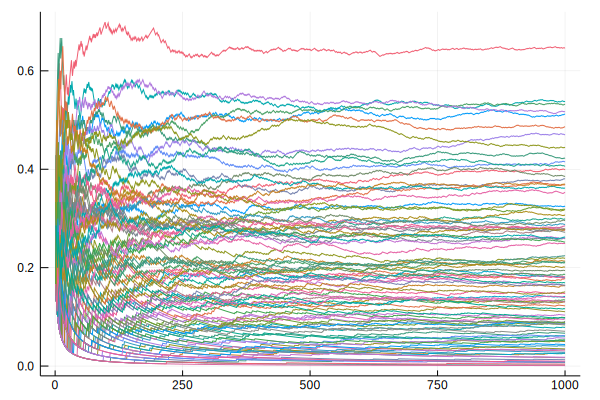

In [92]:
lines = []
final_values = []
for _ in 1:100
    k = 1000
    line = unfold(() -> polya(1,4), k)
    append!(lines,[line])
    append!(final_values, line[k])
end

ensemble_average = mean(final_values)

display(("Ensemble Average:", ensemble_average))
plot(lines, legend=false)

## Gambler's ruin

In [203]:
function gamble(budget, win_probability)
    function gen(budget, stop, bet)
        if stop || budget < bet
            stop = true
        else
            Z = rand()
            if Z < win_probability
                budget += 2*bet
                stop = true
            else
                budget -= bet
                bet *= 2
            end
        end
        return (budget, () -> gen(budget, stop, bet))
    end
    return () -> gen(budget, false, 1)
end


gamble (generic function with 1 method)

("Ensemble Average:", 15.26)

("Win Percentage:", 0.76)

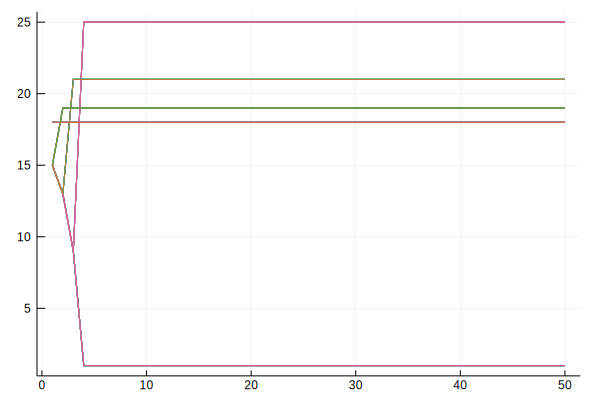

In [183]:
lines = []
final_values = []
initial_budget = 16
wins = 0
num_lines = 100
for _ in 1:num_lines
    k = 50
    line = unfold(gamble(initial_budget, 0.33), k)
    append!(lines,[line])
    append!(final_values, line[k])
    if line[k] > initial_budget
        wins += 1
    end
end

ensemble_average = mean(final_values)

display(("Ensemble Average:", ensemble_average))
display(("Win Percentage:", wins / num_lines))
plot(lines, legend=false)

## Exercise Martingale

In [194]:
function exercise()
    u = 1
    function gen()
        u *= 2*rand()
        return (u, () -> gen())
    end
    return () -> gen()
end

exercise (generic function with 1 method)

("Ensemble Average:", 1.251286253681117e-6)

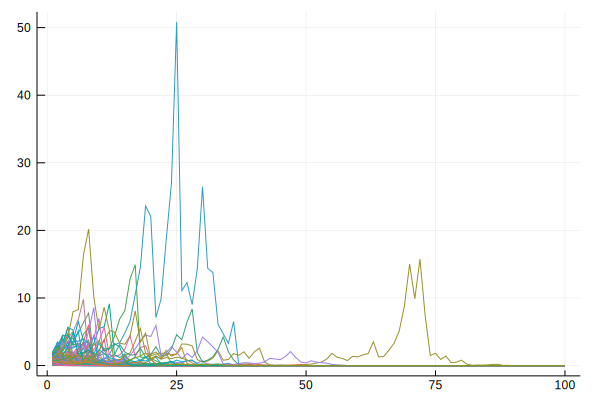

In [202]:
lines = []
final_values = []
for _ in 1:100
    k = 100
    line = unfold(exercise(), k)
    append!(lines,[line])
    append!(final_values, line[k])
end

ensemble_average = mean(final_values)

display(("Ensemble Average:", ensemble_average))
plot(lines, legend=false)


looks weird tbh. numerical inaccuracy for large powers expected

## 2 H

$X_i = H, T$ equiprobable.
What is the expected time of observing ~HH~?

Let $T = \inf\{ i \mid X_{i-1}X_i = HH \}$

We transform $X_i$ into $U_j \sim Geom(1/2)$ (geometric dist. supported on 1,2,...),
Let $N = \inf\{j\geq 2\mid U_j = 1 \}$, then $N-1$ also follows geometric distribution.

By Wald's lemma (all variables have finite expectation):

$$ E[T] = E[\sum_{j=1}^N U_j] = (E[N-1]+1)E[U_1] = 6 $$

Generalizing to biased coins, with $P(X_i=H) = p$, we get

$$ E[T] = (\frac{1}{p}+1)\frac{1}{p} = \frac{1+p}{p^2} $$


In [17]:
function coin(p)
    rand() < p
end

function T(p)
    i = 2
    prev = coin(p)
    curr = coin(p)
    while (prev, curr) != (1,1)
        prev = curr
        curr = coin(p)
        i += 1
    end
    return i
end

mean(map(_->T(1/2),1:1000))

6.043

In [18]:
mean(map(_->T(1/6),1:1000))

42.337

Specialising $p=1/n$:

$$ E[T] = n(n+1) $$